Accuracy: 0.8111111111111111

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        63
         1.0       0.62      0.82      0.71        50
         2.0       0.90      0.82      0.86        67

    accuracy                           0.81       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.84      0.81      0.82       180



/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

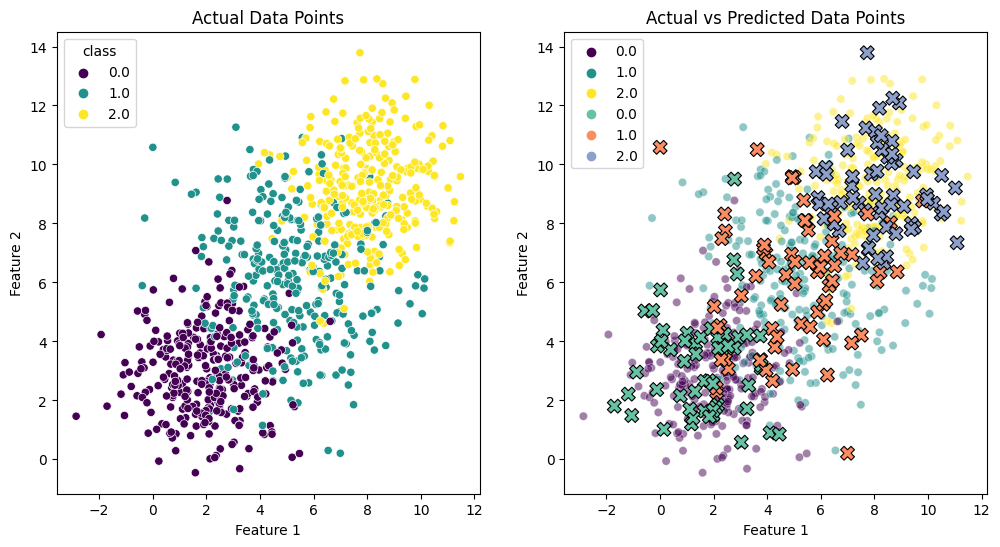

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Define classes and their properties for scattered data
class_list = ["Class A", "Class B", "Class C"]
class_properties = {
    0: {'mean': [2, 3], 'std': [1.5, 1.5]},
    1: {'mean': [5, 6], 'std': [2, 2]},
    2: {'mean': [8, 9], 'std': [1.5, 1.5]}
}

# Generate synthetic data for a classification task
num_samples_per_class = 300
num_features = 2
num_classes = len(class_list)

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(num_samples_per_class, num_features))
    labels = np.full((num_samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)] + ['class']
df = pd.DataFrame(data, columns=columns)

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "decision_tree_model.joblib"
joblib.dump(clf, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot actual and predicted data points
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.subplot(1, 2, 1)
sns.scatterplot(x='feature_1', y='feature_2', hue='class', data=df, palette='viridis')
plt.title('Actual Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot predicted data points
plt.subplot(1, 2, 2)
sns.scatterplot(x='feature_1', y='feature_2', hue='class', data=df, palette='viridis', alpha=0.5)
sns.scatterplot(x=X_test['feature_1'], y=X_test['feature_2'], hue=y_pred, marker='X', s=100, palette='Set2', edgecolor='black')
plt.title('Actual vs Predicted Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()
